# Analisis Isa


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

- Observamos de manera general los datos

In [4]:
df = pd.read_csv('./Isa.csv')
df.head()

,GENERO,EDAD,EXPEDIENTE,IMC,IPID,ASA,RAQ,CIRUGIA P1,CIRUGIA P2,NO PROCEDIMIENTOS,BOUGIE,CORMACK LEHANE,NO INTENTOS
0,F,27,407103,19.7,8,1,U1B,APENDICECTOMIA ABIERTA,NaN,1,NO,1,1
1,M,50,329123,24.3,10,1,U1A,RAFI CUBITO DERECHO,NaN,1,SI,2,1
2,M,32,450773,21.5,9,1,U1B,LAPAROTOMIA EXPLORADORA,ADHERENSIOLISIS,2,SI,2,1
3,F,27,S/E,22.4,10,1,U1B,SALPINGOOFORECTOMIA,NaN,1,NO,1,1
4,M,25,450735,19.0,9,1,E1A,PLASTIA GLENOHUMERAL,NaN,1,NO,2,1


In [5]:
df.describe()

,EDAD,IMC,IPID,ASA,NO PROCEDIMIENTOS,CORMACK LEHANE,NO INTENTOS
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,38.813953,31.856977,10.662791,1.709302,1.174419,1.813953,1.151163
std,16.584551,5.842734,2.394162,0.591435,0.381695,0.743784,0.360308
min,15.000000,19.000000,8.000000,1.000000,1.000000,1.000000,1.000000
25%,25.000000,27.850000,9.000000,1.000000,1.000000,1.000000,1.000000
50%,35.500000,31.900000,10.000000,2.000000,1.000000,2.000000,1.000000
75%,50.000000,36.025000,12.000000,2.000000,1.000000,2.000000,1.000000
max,81.000000,45.000000,16.000000,3.000000,2.000000,4.000000,2.000000


- Hacemos limpieza de datos

In [11]:

def clean_data(df):
    # Drop columns: 'EXPEDIENTE', 'CIRUGIA P2', 'CIRUGIA P1'
    df = df.drop(columns=['EXPEDIENTE', 'CIRUGIA P2', 'CIRUGIA P1'])
    # Map all categorical variables to numerical values
    categorical_columns = ['GENERO', 'BOUGIE']
    df[categorical_columns] = df[categorical_columns].apply(lambda x: x.astype('category').cat.codes)
    # Map 'RAQ' column using raq_levels
    raq_levels = {"U1A": 1, "E1A": 2,"U1B": 3, "E1B": 4, "E2A": 5, "E2B": 6, "U2A": 7, "U2B": 8, "E3A": 9, "U3B": 10}
    df['RAQ'] = df['RAQ'].map(raq_levels)
    return df

# Loaded variable 'df' from URI: c:\Users\bruno_diaz\Documents\Python Scripts\4fun\Isa.csv
df = pd.read_csv(r'c:\Users\bruno_diaz\Documents\Python Scripts\4fun\Isa.csv')

df_clean = clean_data(df.copy())
df_clean.head()

,GENERO,EDAD,IMC,IPID,ASA,RAQ,NO PROCEDIMIENTOS,BOUGIE,CORMACK LEHANE,NO INTENTOS
0,0,27,19.7,8,1,3,1,0,1,1
1,1,50,24.3,10,1,1,1,1,2,1
2,1,32,21.5,9,1,3,2,1,2,1
3,0,27,22.4,10,1,3,1,0,1,1
4,1,25,19.0,9,1,2,1,0,2,1


- Se elimninaron las columnas de Cirugia, y de expediente para esta parte del 
- Se genera la limpieza de los datos usando el sig esquema

*Genero*
|Value|key|
|-|-|
|F|0|
|M|1|

*BOUGIE*
|Value|key|
|-|-|
|NO|0|
|SI|1|


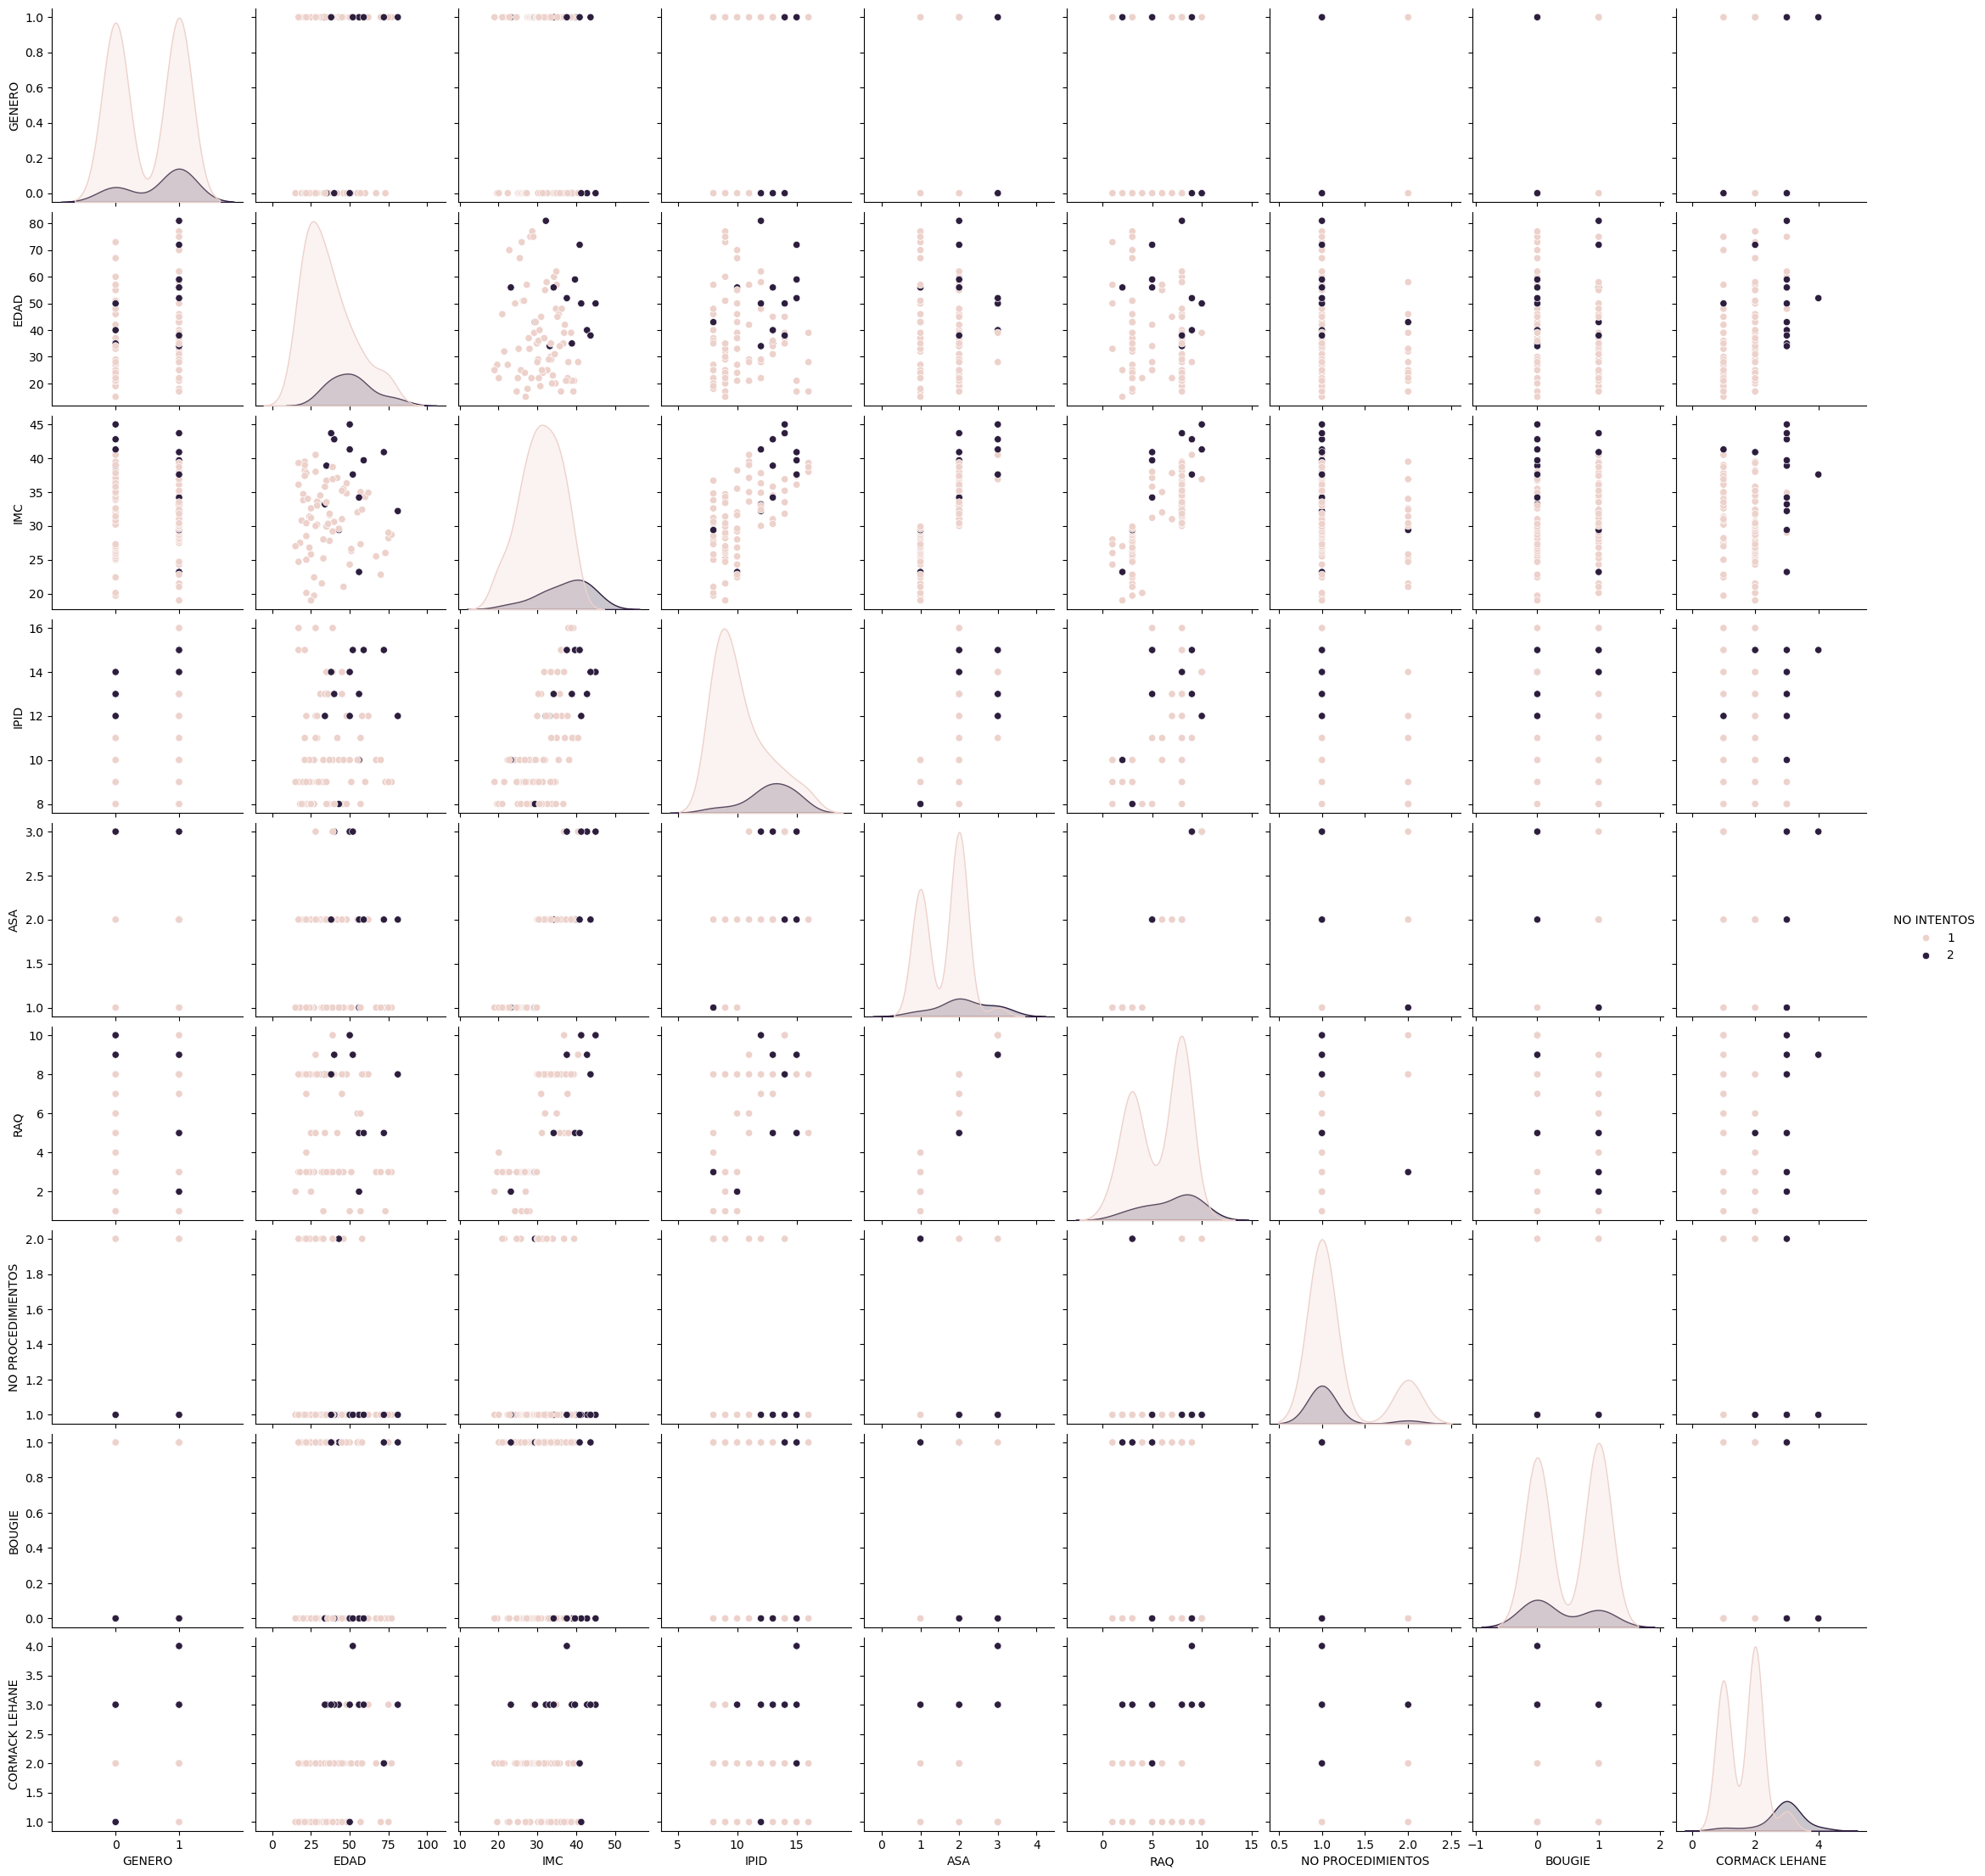

In [12]:
sns.pairplot(df_clean, hue='NO INTENTOS', diag_kind='kde')